Copyright (c) Microsoft Corporation. All rights reserved.

Licensed under the MIT License.

# Indices

In this tutorial, we demonstrate how to use TorchGeo's functions and transforms to compute popular indices used in remote sensing and provide examples of how to utilize them for analyzing raw imagery or simply for visualization purposes. Some common indices and their formulas can be found at the following links:

- [Index Database](https://www.indexdatabase.de/db/i.php)
- [Awesome Spectral Indices](https://github.com/davemlz/awesome-spectral-indices)

It's recommended to run this notebook on Google Colab if you don't have your own GPU. Click the "Open in Colab" button above to get started.

## Setup

Install TorchGeo

In [1]:
%pip install torchgeo

## Imports

In [2]:
%matplotlib inline
import os
import tempfile

import matplotlib.pyplot as plt

from torchgeo.datasets import EuroSAT100
from torchgeo.transforms import AppendNDVI, AppendNDWI, AppendNDBI

## Dataset

We will use the [EuroSAT](https://torchgeo.readthedocs.io/en/stable/api/datasets.html#eurosat) dataset throughout this tutorial. Specifically, a subset containing only 100 images. EuroSAT contains 13-channel multispectral imagery captured by the Sentinel-2 satellite.

In [3]:
root = os.path.join(tempfile.gettempdir(), "eurosat100")
ds = EuroSAT100(root, download=True)
sample = ds[21]

## True Color (RGB) Image

We can plot a true color image consisting of the first 3 channels (RGB) to visualize the sample.

In [4]:
ds.plot(sample)
plt.close()

## Normalized Difference Vegetation Index (NDVI)

Below we use TorchGeo's `indices.AppendNDVI` to compute the [Normalized Difference Vegetation Index (NDVI)](https://gisgeography.com/ndvi-normalized-difference-vegetation-index/). NDVI is useful for measuring the presence of vegetation and vegetation health. It can be calculated using the Near Infrared (NIR) and Red bands using the formula below, resulting in a value between [-1, 1] where low NDVI values represents no or unhealthy vegetation and high NDVI values represents healthy vegetation. Here we use a diverging red, yellow, green colormap representing -1, 0, and 1, respectively.

$$\text{NDVI} = \frac{\text{NIR} - \text{R}}{\text{NIR} + \text{R}}$$

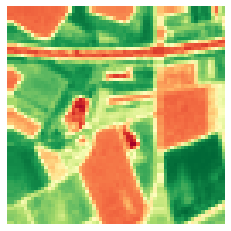

In [5]:
# NDVI is appended to channel dimension (dim=0)
index = AppendNDVI(index_nir=7, index_red=3)
image = sample["image"]
image = index(image)[0]

# Normalize from [-1, 1] -> [0, 1] for visualization
image[-1] = (image[-1] + 1) / 2

plt.imshow(image[-1], cmap="RdYlGn")
plt.axis("off")
plt.show()
plt.close()

## Normalized Difference Water Index (NDWI)

Below we use TorchGeo's `indices.AppendNDWI` to compute the [Normalized Difference Water Index (NDWI)](https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/ndwi/). NDWI is useful for measuring the presence of water content in water bodies. It can be calculated using the Green and Near Infrared (NIR) bands using the formula below, resulting in a value between [-1, 1] where low NDWI values represents no water and high NDWI values represents water bodies. Here we use a diverging brown, white, blue-green colormap representing -1, 0, and 1, respectively.

$$\text{NDWI} = \frac{\text{G} - \text{NIR}}{\text{G} + \text{NIR}}$$

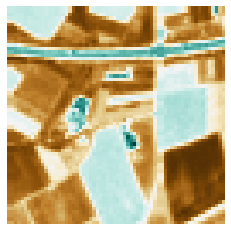

In [6]:
# NDWI is appended to channel dimension (dim=0)
index = AppendNDWI(index_green=2, index_nir=7)
image = index(image)[0]

# Normalize from [-1, 1] -> [0, 1] for visualization
image[-1] = (image[-1] + 1) / 2

plt.imshow(image[-1], cmap="BrBG")
plt.axis("off")
plt.show()
plt.close()

## Normalized Difference Built-up Index (NDBI)

Below we use TorchGeo's `indices.AppendNDBI` to compute the [Normalized Difference Built-up Index (NDBI)](https://www.linkedin.com/pulse/ndvi-ndbi-ndwi-calculation-using-landsat-7-8-tek-bahadur-kshetri/). NDBI is useful for measuring the presence of urban buildings. It can be calculated using the Short-wave Infrared (SWIR)  and Near Infrared (NIR) bands using the formula below, resulting in a value between [-1, 1] where low NDBI values represents no urban land and high NDBI values represents urban land. Here we use a terrain colormap with blue, green-yellow, and brown representing -1, 0, and 1, respectively.

$$\text{NDBI} = \frac{\text{SWIR} - \text{NIR}}{\text{SWIR} + \text{NIR}}$$

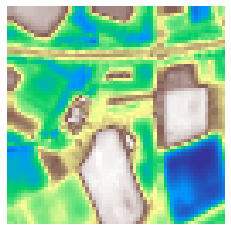

In [7]:
# NDBI is appended to channel dimension (dim=0)
index = AppendNDBI(index_swir=11, index_nir=7)
image = index(image)[0]

# Normalize from [-1, 1] -> [0, 1] for visualization
image[-1] = (image[-1] + 1) / 2

plt.imshow(image[-1], cmap="terrain")
plt.axis("off")
plt.show()
plt.close()